## Logistic regression

In this lab you will get some hands-on experience with one of the most popular classification methods: logistic regression. In the problem of binary classification, it can be used to predict the probability that an instance $\mathbf{x}_{i}$ belongs to a certain class (e.g. $+1$). 

### Exercise 1

In the first exercise we want you to implement a logistic regression classifier by yourself and compare this model to sklearn's implementation of logistic regression. First let's generate some data that is easily seperable.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)
num_observations = 2000

x_class1 = np.random.multivariate_normal([0, 0], [[1, .25],[.25, 1]], num_observations)
x_class2 = np.random.multivariate_normal([1, 4], [[1, .25],[.25, 1]], num_observations)

# Training data:
X_train = np.vstack((x_class1, x_class2)).astype(np.float32)
y_train = np.hstack((np.zeros(num_observations), np.ones(num_observations))) # labels are 0, 1

If we plot the data, we see it is linearly seperable.

(4000,)

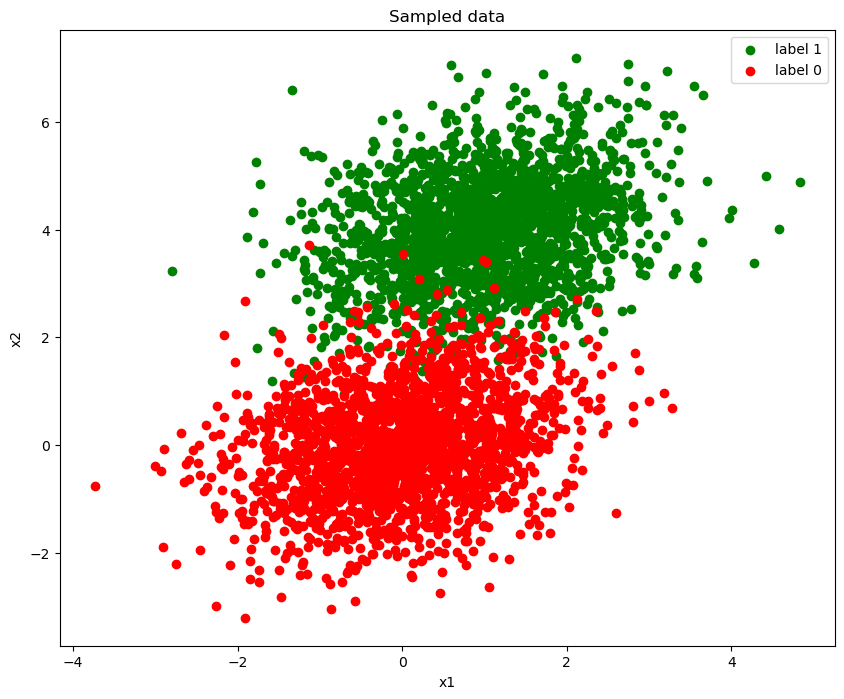

In [2]:
plt.figure(figsize=(10,8))
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='green', label='label 1')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='red', label='label 0')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title('Sampled data')
plt.legend()
y_train.shape

### Gradient descent
Let $\mathbf{x} \in \mathbb{R}^{d}$,  $y \in \{0,1\}$ be some training example and $\mathbf{X} \in \mathbb{R}^{n\times d}$, $\bf{y} \in \mathbb{R}^{n}$ be the training data set. In logistic regression the weights $\mathbf{w}$ of a simple linear model $\mathbf{w}^T\mathbf{x}$ are learned by minimizing the negative log likelihood of the training data. The likelihood can be written as:
$$p(\mathbf{y}|\mathbf{X},\mathbf{w}) = \prod_{i|y_i = 1} \frac{\exp(\mathbf{w}^T\mathbf{x}_i)}{1+\exp(\mathbf{w}^T\mathbf{x}_i)} \prod_{i|y_i = 0} \frac{1}{1+\exp(\mathbf{w}^T\mathbf{x}_i)},$$
then we obtain the log likelihood 
$$\log p(\mathbf{y}|\mathbf{X},\mathbf{w}) = \sum_i y_i \mathbf{w}^T\mathbf{x}_i - \log(1 + \exp(\mathbf{w}^T \mathbf{x}_i))$$

Since there is no analytic solution for this problem, we need to perform numeric optimization, e.g. gradient descent, in order to find the optimal weights $\mathbf{w}^* = \arg \min_{\mathbf{w}} - \log p(\mathbf{y}|\mathbf{X},\mathbf{w})$.  

Try to understand the following function `logistic_regression(X, y, num_steps, learning_rate, add_intercept)`.
A few functions are missing by now: `sigmoid()`, `log_likelihood()`, `log_likelihood_gradient()`. These have to be implemented in the next sections.

- [ ] `sigmoid()`
- [ ] `log_likelihood()`
- [ ] `log_likelihood_gradient()`

In [ ]:
def logistic_regression(X, y, num_steps, learning_rate, add_intercept):
    # X: n x d matrix of instances
    # y: vector of n labels
    
    if add_intercept:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
        
    weights = np.zeros(X.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(X, weights)
        predictions = sigmoid(scores)

        gradient = log_likelihood_gradient(X, y, weights)
        weights -= learning_rate * gradient
        
        if step % 10000 == 0:
            print (neg_log_likelihood(X, y, weights))
        
    return weights

#### Log likelihood

Write a function that calculates the **negative** log likelihood of the data.

Once again, the log likelihood is defined as: 
$$ \log p(\mathbf{y}|\mathbf{X},\mathbf{w}) = \sum_i y_i \mathbf{w}^T\mathbf{x}_i - \log(1 + \exp(\mathbf{w}^T \mathbf{x}_i))$$
$$ \text{Hint: It is possible to calculate the equation using } \mathbf{X} \mathbf{ w} \text{ instead of }\mathbf{w}^T \mathbf{x}_i  $$

In [ ]:
def neg_log_likelihood(X, y, weights):
    ####################
    # INSERT CODE HERE #
    ####################
    return ll
    

#### Sigmoid function

A logistic regression classifier predicts the probability that an instance $\mathbf{x}$ belongs to a certain class $y=1$, by $p(y=1| \mathbf{x}, \mathbf{w}) = \sigma(\mathbf{x}^T\mathbf{w})$. It uses the sigmoid function $\sigma$ to map the outputs/scores of a linear model into probablities: $[-\infty, +\infty] \to [0,1]$.

$$ \sigma(t) = \frac{1}{1+ exp(-t)} $$

Please implement the sigmoid function, that accepts a vector of scores as input and returns a vector of probabilities.

In [ ]:
def sigmoid(scores):
    ####################
    # INSERT CODE HERE #
    ####################
    return s
    

#### Log likelihood gradient

Write a function that returns the gradient of the negative log likelihood. If we derive the log likelihood with respect to $\mathbf{w}$, we obtain the gradient as $$\mathbf{g} = \mathbf{X}^T (\mathbf{y} - \sigma(\mathbf{X} \mathbf{w})).$$

In [ ]:
def log_likelihood_gradient(X, y, weights):
    ####################
    # INSERT CODE HERE #
    ####################  
    return gradient
    

We now test your code:

In [ ]:
from scipy.special import expit

try: 
    temp_value1 = neg_log_likelihood(X_train, y_train, [-10,12])

    intercept = np.ones((X_train.shape[0], 1))
    X_temp = np.hstack((intercept, X_train))
    temp_value2 = neg_log_likelihood(X_temp, y_train, [-6,4,-0.08])
    
    rounded_value1=np.ceil(temp_value1)
    rounded_value2=np.ceil(temp_value2)
    
    assert  rounded_value1 == 11012.0, "The log likelihood calculation;" + str(rounded_value1)+';'+str(11012.0)
    assert  rounded_value2 == 6559.0, "The log likelihood calculation;" + str(rounded_value2)+';'+str(6559.0)
    
    temp_value1 = sigmoid(0.25)
    temp_value2 = sigmoid(10)
    rounded_value1 = float("{:.4f}".format(temp_value1))
    rounded_value2 = float("{:.4f}".format(temp_value2))
    
    temp_value3 = expit(0.25)
    temp_valu42 = expit(10)
    rounded_value3 = float("{:.4f}".format(temp_value3))
    rounded_value4 = float("{:.4f}".format(temp_valu42))
    
    assert rounded_value1 == rounded_value3, "The sigmoid calculation;" + str(rounded_value1)+';'+str(rounded_value3)
    assert rounded_value2 == rounded_value4, "The sigmoid calculation;" + str(rounded_value2)+';'+str(rounded_value4)
    
    def help_rounder(array):
        for i in range(len(array)):
            array[i] = float("{:.4f}".format(array[i]))
        return array
    
    temp_value1 = log_likelihood_gradient(X_train,y_train,[20,10])
    rounded_value1 = help_rounder(temp_value1)
    temp_value2 = log_likelihood_gradient(X_train,y_train,[5,-10])
    rounded_value2 = help_rounder(temp_value2)
    intercept = np.ones((X_train.shape[0], 1))
    X_temp = np.hstack((intercept, X_train))
    temp_value5 = log_likelihood_gradient(X_temp,y_train,[-15,10,0.5])
    rounded_value5 = help_rounder(temp_value5)
    
    rounded_value3 = [721.0687,476.1421]
    rounded_value4 = [-1830.7943, -8656.9904]
    rounded_value6 = [-1086.3782,  -226.6353, -4527.7163]
    

    assert all(rounded_value1 == rounded_value3), "The log likelihood gradient calculation;" + str(rounded_value1)+';'+str(rounded_value3)
    assert all(rounded_value2 == rounded_value4), "The log likelihood gradient calculation;" + str(rounded_value2)+';'+str(rounded_value4)
    assert all(rounded_value5 == rounded_value6), "The log likelihood gradient calculation;" + str(rounded_value5)+';'+str(rounded_value6)    
    print ("The code seems fine.")
    
except AssertionError as err:
    parts=str(err).split(';')
    print ("Currently there is a fault in: ",parts[0])
    print("expected value:", parts[2], "instead got value:",parts[1])
    print("Note: Values are rounded")

#### Exercise 1.5 (sklearn)
We start by training the weights of the logistic regression model on the training data, using the function logistic_regression(). We select a reasonable value for the number of steps (e.g. $30000$) and learning rate (e.g. $5e-5$) and make use of the option to add an intercept to the data.

In [ ]:
weights = logistic_regression(X_train, y_train, num_steps=30000, learning_rate=5e-5, add_intercept=True)

Now use the sklearn package 'LogisticRegression' to train a logistic regression classifier clf on the same data and compare its weights to the weights of your model. 

Note: sklearn uses L2 regularization by default, so you should turn it off to make results comparable.

In [ ]:
from sklearn.linear_model import LogisticRegression

####################
# INSERT CODE HERE #
####################

# clf = 

# Print weights of both models:
print (clf.intercept_, clf.coef_)  # sklearn's weights
print (weights)                    # your model's weights

#### Exercise 1.6 (Classification)

Calculate predictions for the training data (X_train with added intercept) using your logistic regression model (i.e. calculate the scores of the linear model and map it to probabilities using the sigmoid function) and compare your results to sklearn's accuracy.

In [ ]:
data_with_intercept = np.hstack((np.ones((X_train.shape[0], 1)),X_train))

####################
# INSERT CODE HERE #
####################
# preds = 

# Compare results:
print ('Your accuracy: {0}'.format((preds == y_train).sum().astype(float) / len(preds)))
print ('Sklearn\'s accuracy: {0}'.format(clf.score(X_train, y_train)))

### Exercise 2

Now we consider another dataset which consists of 22 features, each containing a test result for microchips. The target variable is whether the chip is "defect" or "not defect". 

First we load the dataset into a dataframe. We will only consider the first two features 'test1' and 'test2'. 

In [ ]:
from __future__ import division
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Loading the dataset
data = pd.read_csv('data_chiptests.txt',header=None, names = ('test1','test2','released'))
data.info()

In [ ]:
X = data.iloc[:,:2].values        # instances
y = 2 * data.iloc[:,2].values-1   # labels

# Plot the data 
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Non Defect')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', label='Defect')
plt.xlabel("test1")
plt.ylabel("test2")
plt.title('MicrochipTest')
plt.legend()
y.shape

#### Exercise 2.1 (sklearn)

Use the sklearn package LogisticRegression again to implement a simple logistic regression classifier clf. Consider the cases, where the regularization parameter is chosen to be: $C=0.01;C=0.1; C=1; C=100$. In each case compute the accuracy on the training sample. What do you observe?

In [ ]:
####################
# INSERT CODE HERE #
####################
from sklearn.linear_model import LogisticRegression

# clf = 

We use a function plot_boundary to plot the decision boundary of the trained model with the best training accuracy.

In [ ]:
def plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=None):
    # clf: trained model
    # X: instances
    # y: labels
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step), np.arange(y_min, y_max, grid_step))
    
    if poly_featurizer == None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, cmap = plt.cm.Paired)

If everything went well, we can now have a look at the decision boundary of the trained model together with the data. What do you observe?

In [ ]:
BestC=??? #Modify
clf = LogisticRegression(C=BestC, n_jobs=-1,)
clf.fit(X, y)

plot_boundary(clf, X, y, grid_step=.01)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Non Defect')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', label='Defect')
plt.xlabel("Test1")
plt.ylabel("Test2")
plt.title('Logit with C= {}'.format(BestC))
plt.legend();

print("accuracy:", round(clf.score(X, y), 3))

#### Exercise 2.2 (Polynomial features)

As you have seen the performance of simple logistic regression for linearly not separable data is quite poor. Polynomial features for 2-dimensional vector $x = (x_{1},x_{2})$ of dimension $r$ would be the set of features: 
$$\{x_{1}^{i}x_{2}^{j}\}_{i+j\leq r, 0 \leq i,j \leq r}.$$

For example for $r=2$ the polynomial features for $x=\{x_{1},x_{2}\}$ would be: 
$$\{1,x_{1},x_{2},x_{1}x_{2},x_{1}^{2},x_{2}^{2}\}$$

Compute polynomial features of degree $r=5$. Use the sklearn package PolynomialFeatures to produce polynomial features for the instances $\mathbb{X}$ (Hint: method "fit_transform" will be useful).

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

####################
# INSERT CODE HERE #
####################

# X_poly = 

#### Exercise 2.3

Now train a logistic regression model clf_2 using the polynomial features.

In [ ]:
####################
# INSERT CODE HERE #
####################

# C = 
# clf_2 = #Note: use the variable C

Let's evaluate and plot the decision boundary again. What do you observe?

In [ ]:
plot_boundary(clf_2, X, y, grid_step=.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Not Defect')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', label='Defect')
plt.xlabel("Test1")
plt.ylabel("Test2")
plt.title('Logit with C= {}'.format(C))
plt.legend();

print("Prediction Score:", 
round(clf_2.score(X_poly, y), 3))